# Top articles in Wikipedia 2019
Author: Gabriel Velástegui

The original idea comes from this [article](https://towardsdatascience.com/interactive-the-top-2019-wikipedia-pages-d3b96335b6ae) from Felipe Hoffa published on January 2020. The article focuses on the top articles of the English Wikipedia in 2019. I decided to do a slightly different version by checking the top ten articles by each month. I also compare the results between four different languages: English, Spanish, Russian and German.

There are some tools that allow to analyze articles' stats from Wikipedia, like [WikiShark](https://www.wikishark.com/), [Wikimedia stats](https://stats.wikimedia.org/) or [Pageviews Analysis](https://iw.toolforge.org/pageviews). This last one is especially interesting, because of the wide range of options to visualize articles' metrics. As I was exploring the results of the most viewed articles from the Spanish Wikipedia, I found Hoffa's article and decided to explore this dataset from 2019 for different languages.

I used Python for this project. This notebook focuses more on data cleaning, analysis and visualization. The data import process is described in the repository on Github, together with all the scripts used for this project.

#### Dependencies:
- Repository: https://github.com/gra-vel/wiki-2019
- Python: pandas, matplotlib, seaborn, plotly

In [1]:
import wiki_analysis
import wiki_visual
import plotly.offline as py
py.offline.init_notebook_mode(connected=True)

### Data

Initially, the raw imported data from Wikipedia’s API had certain terms that did not add much to the analysis. Terms such as “Wikipedia:” or “Main_Page” could give an insight into the way users interact with the webpage overall. However, the purpose of the project is to find which individual articles are the most viewed. Therefore, all these terms were removed from the dataset.

The main issue with the data is that some of the articles’ views may come from spam, botnets or as result of errors. Wikipedia allows to retrieve data based on its origin (user, spider or automated). However, spam or botnets could be able to pass as a user, so its views will be counted as coming from human users, skewing the overall total at the end. This is why the main task in this project was to find a way to figure out when the views came from legitimate users or automated programs, considering the available information from the API.

One way I was able to identify possible automated views was by checking daily views by access (desktop, mobile-web and mobile-app). It is possible to identify certain inconsistencies between access methods that could point out to automated views as shown next.

### Data wrangling

To come up with the final list for the analysis, I had to exclude a set of articles because a significant number of views appeared to come from spam or botnets. To do this, I decided to check the distribution of views for each article through visualization.

To illustrate this analysis I use the initial dataset for the English Wikipedia, which only excluded terms such as *Wikipedia:*, *Special:* or *File:*

In [2]:
# importing initial data for english wikipedia
wiki_en_initial = wiki_analysis.Wiki_all_access("2019_en_wikidaily_init.csv", "utf-16")
wiki_en_initialdf = wiki_en_initial.get_df()

# sample of first ten rows for english wikipedia
wiki_en_initialdf.head(10)

,article,timestamp,desktop,month,mobile-app,mobile-web,days,total
0,Ted_Bundy,2019010100,1865,1,272,9569,1,11706
1,Ted_Bundy,2019010200,4081,1,424,18248,2,22753
2,Ted_Bundy,2019010300,3458,1,283,10675,3,14416
3,Ted_Bundy,2019010400,3577,1,315,12050,4,15942
4,Ted_Bundy,2019010500,2205,1,270,10623,5,13098
5,Ted_Bundy,2019010600,2202,1,309,10335,6,12846
6,Ted_Bundy,2019010700,3157,1,228,8492,7,11877
7,Ted_Bundy,2019010800,3569,1,262,8212,8,12043
8,Ted_Bundy,2019010900,3785,1,209,8696,9,12690
9,Ted_Bundy,2019011000,3848,1,242,8783,10,12873


In [3]:
# observations and variables
wiki_en_initial.get_df().shape

(3638, 8)

The dataset contains information on daily views by desktop, mobile-app and mobile-web. There is a timestamp together with a variable for month and day of the month. There are a total of 3 638 observations in 8 variables.

### Bar plot for views

The first step was to check for patterns, using the monthly number of views for all articles by different methods of access. A potential problem in this approach is that the y-axis will not remain constant when comparing the same article by desktop, mobile-app and mobile-web. The reason is that the number of users for the three methods of access varies widely and, as we will see later, it appears that most of these articles are accessed primarily through the mobile-web version.

To address this issue, I normalized the number of views by month, so the y-axis will remain between 0 and 1. In this way, when the bar plot hits 1, it means that the article reached its peak in views in that month and in that method of access.

Here are the bar plots for January, May and November. I added high-res versions of these plots in the repository ([January](https://github.com/gra-vel/wiki-2019/blob/master/bar%20plots/January.png), [May](https://github.com/gra-vel/wiki-2019/blob/master/bar%20plots/May.png) and [November](https://github.com/gra-vel/wiki-2019/blob/master/bar%20plots/November.png)), because they are too big for the notebook. Nonetheless, it is still possible to distinguish the distribution of views throughout each month, which is the main purpose of these plots.

Each column is an article and each row is a method of access, beginning with 'desktop' in the first row, 'mobile-app' in the second one and 'mobile-web' in the last row.

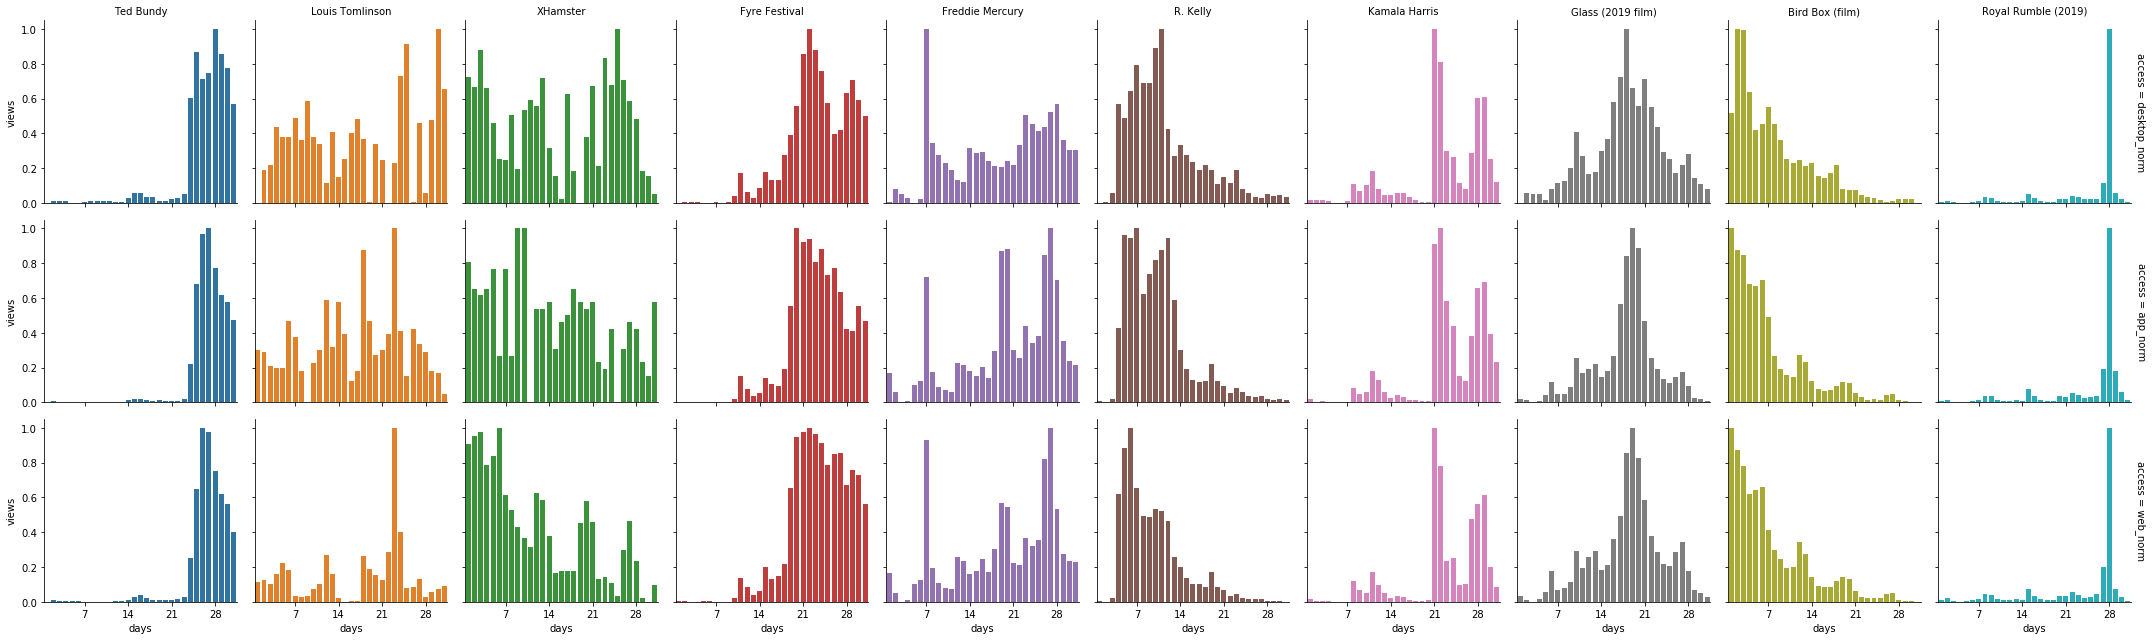

In [4]:
# January
wiki_en_initial.barplot_month(1)

It is possible to see how several articles have the same trend among different methods of access. For instance, the first article (blue) for *Ted Bundy* reaches its peak for views around January 27th, a few days after a documentary about the serial killer was premiered. Another example is the article (pink) for *Kamala Harris*, which reached its peak on views on January 21st; the day the politician announced she was running for president of the US. The distribution in views for these cases is remarkably similar for the three methods of access, which would suggest that it is unlikely that we are dealing with automated views. 

However, the second (orange) and third (green) articles have an inconsistent distribution. Their peaks hardly match around the same day and the distribution looks vastly different from one method access to the other. In turn, this raises a suspicion that we may be seeing automated views. As shown later, it is almost always the case that these views are solely concentrated on desktop and only on certain days.

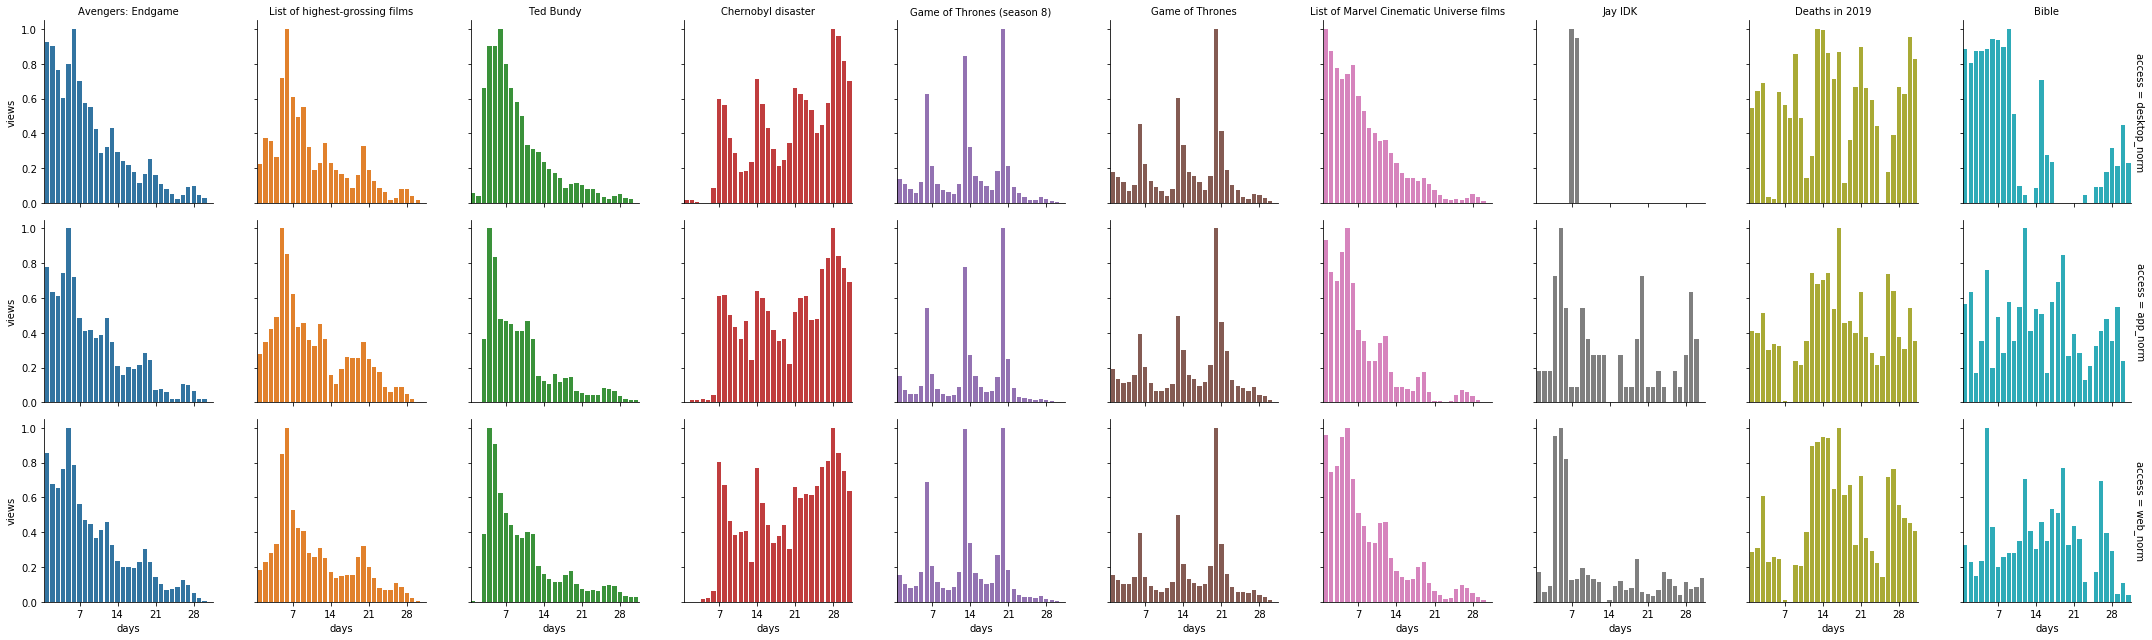

In [5]:
# May
wiki_en_initial.barplot_month(5)

Once again, several articles share the same distribution in views for all methods of access. A noticeable trend is the way two or more related articles share similar distributions. The first (blue) and seventh (pink) articles have the similar distributions because they are closely related to the same movie: one is *Avengers: Endgame* and the other one is *List of Marvel Cinematic Universe films*. Another example is the fifth (purple) and sixth (brown) articles, which are both related to a TV-series: one is *Game of Thrones (season 8)* and the other one is *Game of Thrones*. In this case, it is even possible to see how the peak of searches matches the first three Sundays of May, which coincide with the last three aired episodes of the TV-show.

As in January, there are also articles that have big differences between desktop, mobile-app and mobile-web. The eight article (gray) clearly shows something peculiar for desktop, where all of its views apparently are concentrated on two days in the entire month. The last article also shows no sign of being related between its three plots.

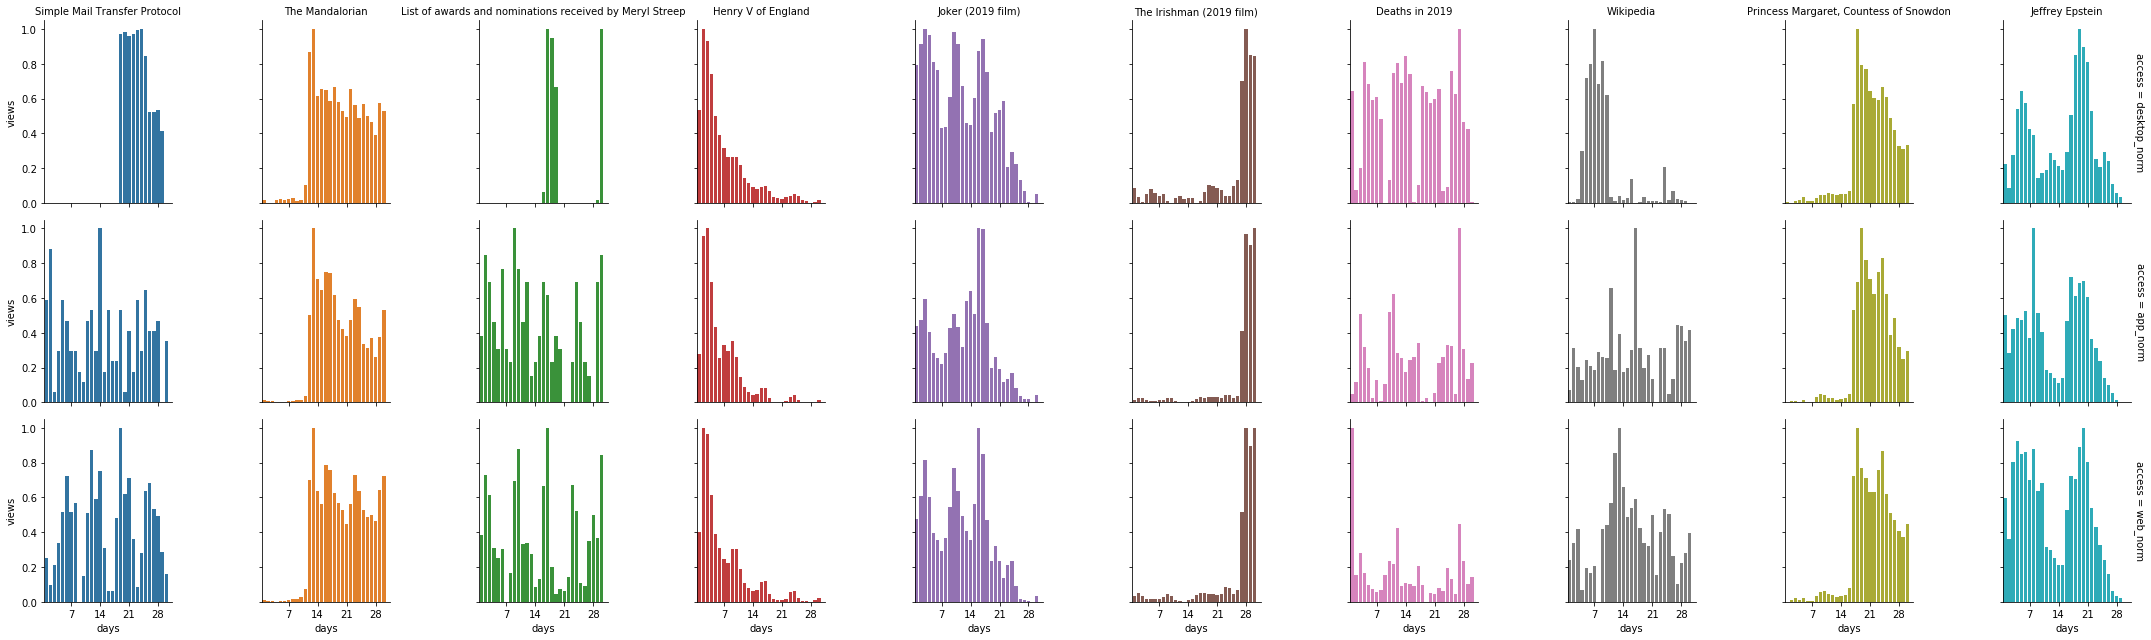

In [6]:
# November
wiki_en_initial.barplot_month(11)

In November, it is clear that most articles share the same distribution along desktop, mobile-app and mobile-web. It is important to consider that the day when an article’s views reach a peak coincide with some relevant event happening around the same date. It would be entirely possible that, even in these cases, there are some automated programs being registered as human users. However, in order to identify these individual cases, a different analysis approach and more data about each specific view would be needed.

At this point, the assumption is that if an article share the same distribution along two or more methods of access, the views are coming from human users. Otherwise, the views are the result of spam and the article is discarded. To support this assumption, I inspect some of these articles' views in a more detailed analysis.

### Heat maps

To make sure that I am not removing any relevant articles based on the previous assumption, I check the distribution of views for articles that look legitimate and compare them to other suspicious articles. The idea is to identify a trend for one group and see how they differ from another group.

To visualize this analysis, I created two heat maps per article. The first heat map shows the daily percent of views (rows) by each method of access (columns). The second heat map shows the normalized views for each method of access along the same month. This means that when an article reaches its peak on views in a month, the normalized value turns into 1. 

After checking most of the articles using this method, two important trends emerged from this analysis:
- **The trend in percentage of views remained basically the same: mobile-web > desktop > mobile-app.**
- **As the articles reach their peak in each month, the percentage of views changes very little between each method of access.** This means that the percentage of views between each method of access does not vary significantly throughout the month, regardless of where the peak of views is.

Naturally, there are exceptions to these trends, which are covered at the end of this section. However, if an article does not fit to the previous two points, there is a reason to suspect that their views come from automated sources. As shown in the next examples, is rather difficult to explain certain values in these plots, which would suggest the presence of automated views.

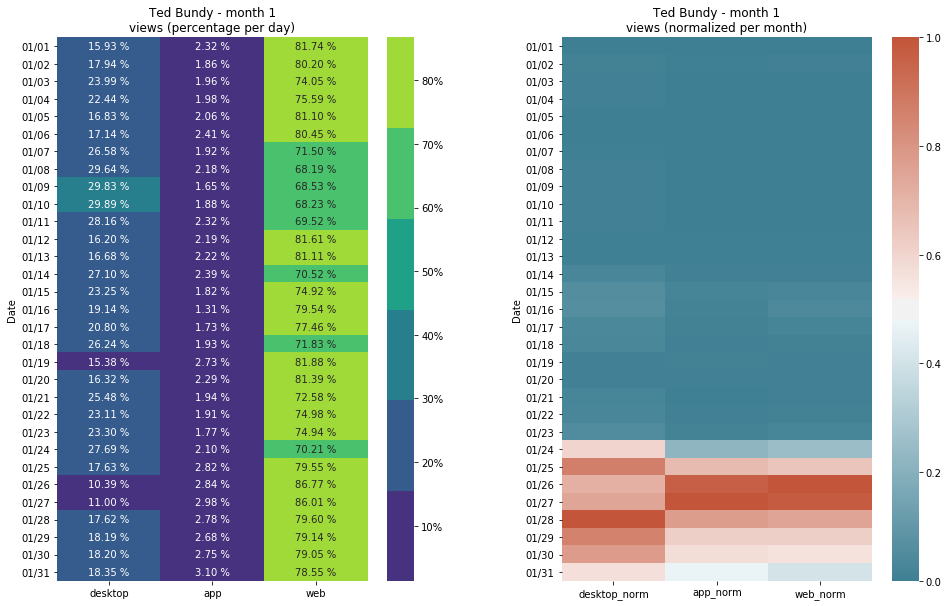

In [7]:
wiki_en_initial.article_heatmap('Ted Bundy',1)

Using the example from the previous section, I start with the article for *Ted Bundy*. From the heat map on the right, it is clear that most of the views came in as result of the documentary premiere on January 27th. For both mobile-app and mobile-web, they reached one of highest number of daily views around this date. For desktop, its peak was one day later. Checking the heat map on the left shows that the percentage of views concentrated on mobile web around January 27th. Nonetheless, this deviation goes along with the same trend for the entire month: the share in mobile-web represent the bulk of views for the article. Moreover, it seems that previous deviations, like in the second week of January, are not that significant, because they barely are registered on the heat map with normalized values for the month.

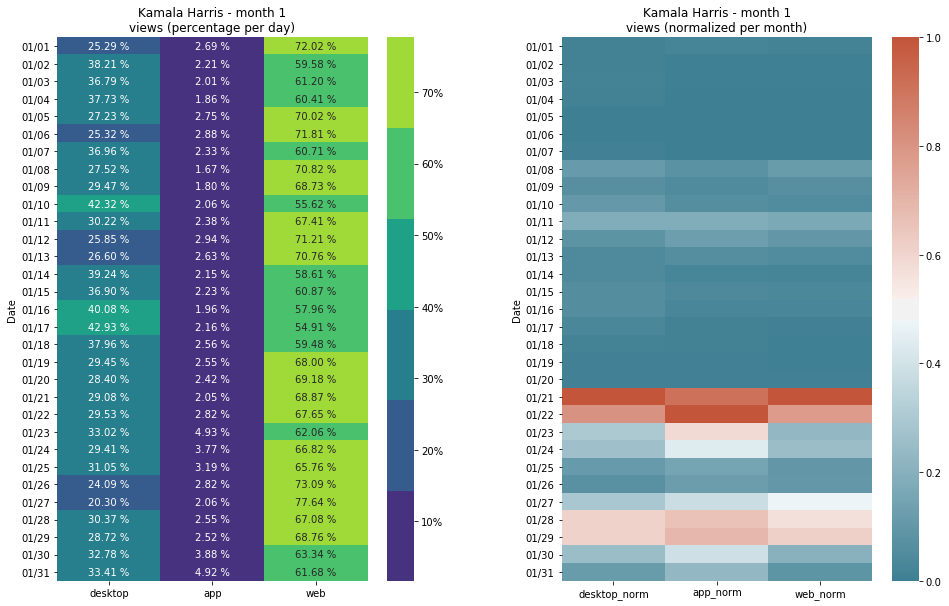

In [8]:
wiki_en_initial.article_heatmap('Kamala Harris',1)

For the article on *Kamala Harris*, it is clear that there are two important dates: January 21st and January 28th. Both coincide with her announcement and official campaign kickoff, respectively. In comparison to the previous article, this one has less views coming from mobile-web. There is also no clear deviation from the previous trend for the dates, when the article was visited the most. If anything, it appears that on both dates, the number of views on desktop increased compared to mobile-web.

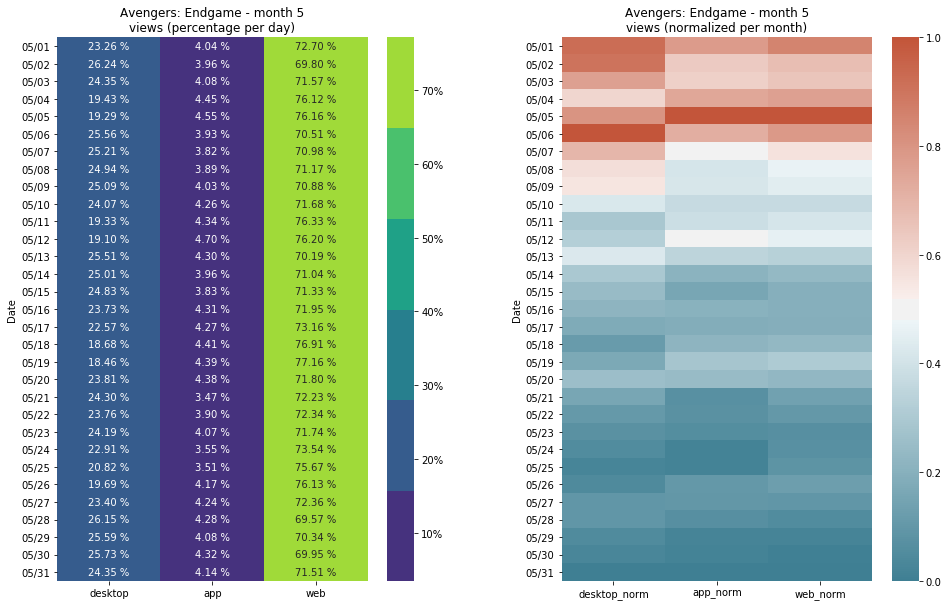

In [9]:
wiki_en_initial.article_heatmap('Avengers: Endgame',5)

For the article on *Avengers: Endgame*, it seems that its peak on views came around May 5th for this particular month. Compared to the two previous articles, the number of views here are more spread throughout the first two weeks of the month. In contrast, the other two examples showed more concentration along one or two specific dates. In terms of percentage of views, it is also noticeable the lack of deviations between desktop, mobile-app and mobile-web. In fact, the variablity of views by each method of access remains around 8%.

An interesting detail comes from the peak of views for this article, which did not become obvious to me until I plotted the final visualization. This movie was released at the end of April, so I expected to see the highest peak on May 1st showing the normal fall in views as other articles. However, I later realized that this is not the normal trend for this kind of movies. Movie theaters are usually crowded on weekends and May 5th is on a weekend. In fact, May 12th and May 19th are the next higher points in the right plot and they are also weekends. Not only that, but the percentage of views on mobile-web also reached their highest points on these dates. This would suggest that people visited the Wikipedia article on their phones around the time they went to watch the movie. This pattern repeats itself with other movies throughout the year.

It is also possible to see this in the previous bar plot for May although it is more noticeable in the final plot together with other movies.

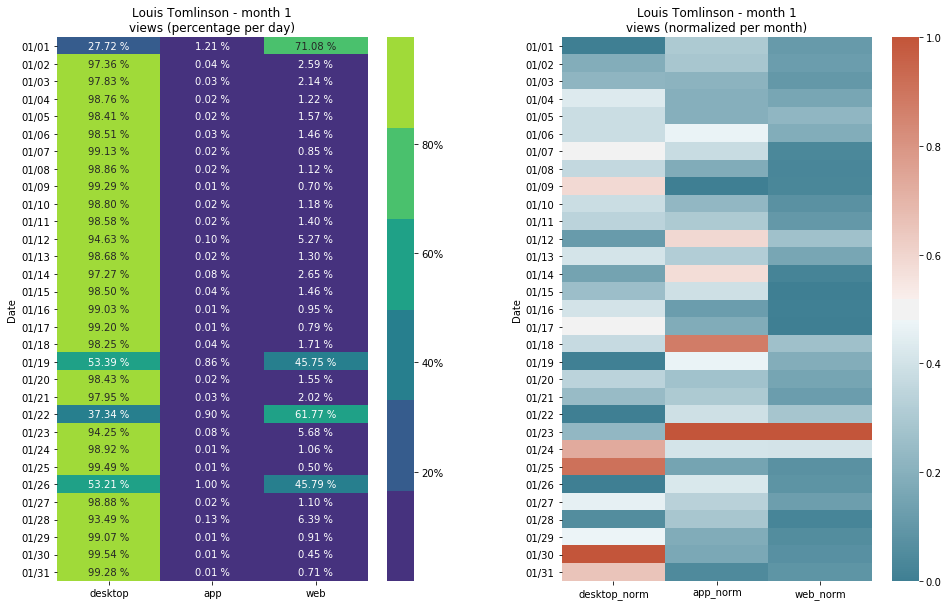

In [10]:
wiki_en_initial.article_heatmap('Louis Tomlinson',1)

This is what a suspect article looks like. From the right heat map, no clear trend on monthly views emerge. In the desktop version of the article, it appears as if the number of views each day was close to the monthly average of views. In terms of percentage by access, desktop has over 97% of access most days. This completely breaks the trend from previous articles. The clear exceptions are four dates, where the percentage value changes abruptly. 

Checking the number of views by access reveals the problem. The views in mobile-web are under 10 000 the entire month and under 100 for mobile-app. In contrast, the views for the desktop are over 100 000 for most days in the month. The highest number of views goes as high as 464 035. It is also clear that the views increase and decrease with no clear trend. The Wikipedia article belongs to an English singer and is the second most visited article in the month. However, there is no relevant event in the month to explain an increase in views. Therefore, I concluded that most of these views are not coming from human users and the article was excluded from the final list.

In [11]:
wiki_en_initialdf.loc[(wiki_en_initialdf.article == 'Louis_Tomlinson') & (wiki_en_initialdf.month == 1),['article','timestamp','desktop','mobile-app','mobile-web']]

,article,timestamp,desktop,mobile-app,mobile-web
31,Louis_Tomlinson,2019010100,897,39,2300
32,Louis_Tomlinson,2019010200,88273,38,2351
33,Louis_Tomlinson,2019010300,102970,33,2253
34,Louis_Tomlinson,2019010400,203391,32,2514
35,Louis_Tomlinson,2019010500,176764,32,2823
36,Louis_Tomlinson,2019010600,177957,50,2639
37,Louis_Tomlinson,2019010700,227665,44,1943
38,Louis_Tomlinson,2019010800,169026,31,1913
39,Louis_Tomlinson,2019010900,273500,19,1932
40,Louis_Tomlinson,2019011000,177785,34,2125


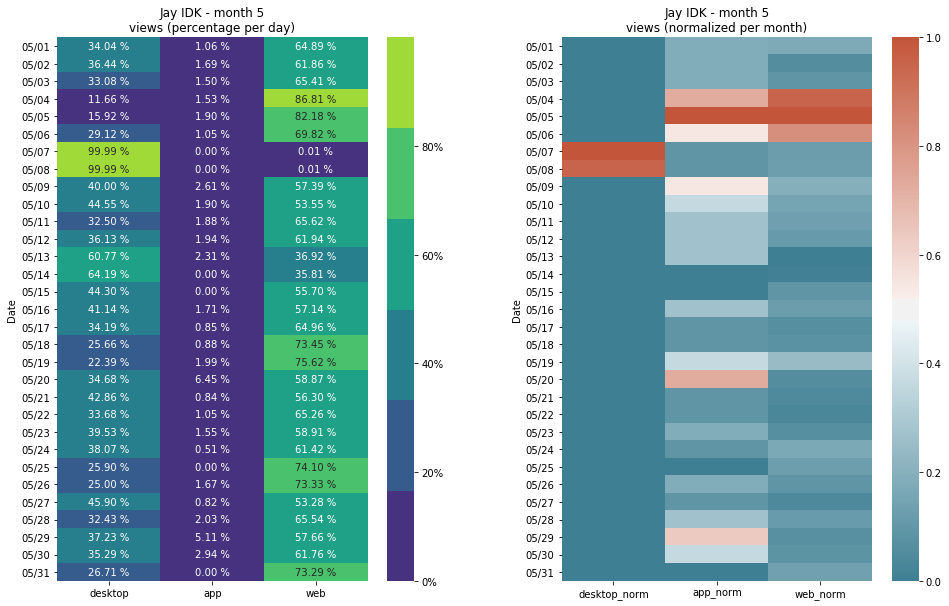

In [12]:
wiki_en_initial.article_heatmap('Jay IDK',5)

This is another article where the analysis suggests automated views. In principle, the trend is close to other articles: mobile-web has the most of the views for the entire month. It appears, as if there is a peak around May 5th for the app-mobile and web-mobile. However, for desktop that value comes two days later with 99.99% of total views coming from desktop. This is enough to know that something is not right with the values for views in this article. Upon checking the table of views, again it becomes clearer where the issue is: two days in the month have over 1 600 000! These numbers are so striking when comparing them to the rest of the month, because for the most part they are well below 100. For some days in mobile-app it is even 0 or 1. Clearly, it is highly unlikely that there was a sudden interest on this article for only two days and that almost every single person decided to check it only from the desktop version.

In [13]:
wiki_en_initialdf.loc[(wiki_en_initialdf.article == 'Jay_IDK') & (wiki_en_initialdf.month == 5),['article','timestamp','desktop','mobile-app','mobile-web']]

,article,timestamp,desktop,mobile-app,mobile-web
1417,Jay_IDK,2019050100,64,2,122
1418,Jay_IDK,2019050200,43,2,73
1419,Jay_IDK,2019050300,44,2,87
1420,Jay_IDK,2019050400,61,8,454
1421,Jay_IDK,2019050500,92,11,475
1422,Jay_IDK,2019050600,166,6,398
1423,Jay_IDK,2019050700,1682907,1,101
1424,Jay_IDK,2019050800,1600124,1,103
1425,Jay_IDK,2019050900,92,6,132
1426,Jay_IDK,2019051000,94,4,113


After checking these articles, it becomes clear the usefulness of the bar plot in the previous section. If the distribution of views was similar enough for the three methods of access, I assumed the views did come from human users. In some cases, two similar distributions would be enough. However, if there were clear differences among the three plots, I would check these heat maps to make sure that I was not removing an article by mistake. All these articles were added to the import function to remove them from the list after querying the API. I followed the same process for all four languages.

#### The exceptions

The heat maps helped to visualize details in trends that were not evident from the bar plot. In some cases, these articles did not followed the same trend as the majority of articles, that is most of the views coming from mobile-web and clear dates for highest number of views. 

For instance, in the English Wikipedia for 2019, one of the most edited articles is *Deaths in 2019*. I assume that the article was being constantly updated over the entire year, which is why it appears as one of the top ten most visited articles for every single month, except April. It is one of the few articles, where most of the visits came from the desktop version. Despite this, I decided to include this article, because it keeps the same trend for the entire year in terms of percentage of access by desktop. Moreover, it is possible to distinguish that its peaks in views correspond to someone famous passing away. The German Wikipedia also has the German version as one of its top visited articles for several months.

In the Spanish Wikipedia, there is also an interesting example of a trend for some articles. Some of them look like are mostly accessed through the desktop version and follow a repetitive trend for every other month. At first, I thought they were automated views, but checking all of them together in the final plot lead me to believe that it was showing the behavior a specific type of user. Articles such as *Tabla periódica de los elementos* (periodic table), *Primera Guerra Mundial* (World War I) and *Segunda Guerra Mundial* (World War II) look almost identical for some dates, which suggest that students might be actively using these articles for assignments or to study a specific subject. The fact that these articles are visited mostly during weekdays and how closely they match each other in distribution helped me to identify this possible explanation, which is why I also decided to leave these articles in the final dataset.

Another example in other languages is *Deutschland* in German and *Россия* in Russian. Both articles refer to the country were the most native speakers of said language live; that is Germany and Russia, respectively. At first it looked like they were automated views, but upon closer analysis I noticed the same trend that also appears in the Spanish Wikipedia for the articles mentioned before. As there might be a chance that these views have educational purposes, I also decided to include them for the final plot. 

It is entirely possible that the assumptions are not correct and all of these articles' views are coming from automated programs. It is worth mentioning that these articles do have some peaks in some months, for which I did not find any evident reason. In this sense, I took some liberty including these articles, as there is a reasonable explanation behind some of these views, in contrast to the last two analyzed articles in the previous section. However, as stated above, a more detailed analysis for each article view would require a different approach and a different dataset. Ultimately, for the purpose of this project, I think the analysis so far has managed to exclude the extreme cases in each dataset.

In [14]:
# importing final data
wiki_es = wiki_analysis.Wiki_all_access("2019_es_wikidaily.csv", "latin1") #spanish
wiki_en = wiki_analysis.Wiki_all_access("2019_en_wikidaily.csv", "utf-16") #english
wiki_de = wiki_analysis.Wiki_all_access("2019_de_wikidaily.csv", "utf-16") #german
wiki_ru = wiki_analysis.Wiki_all_access("2019_ru_wikidaily.csv", "utf-16") #russian

### Analysis and visualization - Most viewed articles in Wikipedia for 2019

I decided to use plotly for this visualization, because I wanted to create an interactive plot. I use buttons for the entire year and one for each month. The plot for the entire year looks cluttered, but it allows comparing the highest number of views in one day. When looking individual months, it is easier to distinguish specific trends for a subset of articles. Moreover, in the first plot, it is also possible to see trends for articles that were among the top 10 for several months. However, it is possible to create a bigger plot from the Python script to better appreciate the details than the plot in this notebook.

#### Common trends

- Two categories stand out in these four languages: entertainment and deaths of notable individuals.


- For events, the Notre Dame Cathedral was one of the most viewed articles in a single day for each language, after the fire that took place in April.


- Interest for these topics -probably due to TV shows or films- are reflected in every language:
    - Chernobyl disaster
    - Charles Manson and Sharon Tate
    - Elizabeth II

In [ ]:
wiki_visual.lang_plot(wiki_en.get_df(), 'total', 'English')

#### English Wikipedia
- It is dominated by articles related to movies and TV series. However, three out of the five most viewed articles in a single day are from celebrities that died prematurely: *Cameron Boyce*, *Nipsey Hussle* and *Luke Perry*.


- Articles related to released movies usually have a clear trend indicating that they are mostly accessed during the weekends. This makes sense, since movie theaters get crowded during this time of the week, so people is reading more about the movie around the time they are seeing it. This trend is identified with *Freddie Mercury* (although the movie is titled Bohemian Rapsody), *Avengers: Endgame*, *Captain Marvel (film)*, *Shazam! (film)*, *Spider-Man: Far From Home*, *Once Upon a Time in Hollywood*, *Joker (2019 film)*.


- For movies, TV series and documentaries in streaming services, a similar trend is also noticeable, although there are some exceptions.


- Certain events are identified not by the number of views of their own article, but by the views of other articles related to it. That is the case for the 2019 Oscar awards. The article of the ceremony does not appear on the most viewed in the month, but the article for *Rami Malek* (winner of best actor award) is the most viewed article in a single day in February. The articles for *Lady Gaga* and *Bradley Cooper* (both participated in a performance in the event) also appear as part of the most viewed articles one day after the event took place. 


- The same pattern can be seen for several articles related to movies, series and documentaries, where the most views go to the individuals or events referred in each production. This also happens in the other languages.
	- *Ted Bundy*, *Fyre Festival*, *Murder of Dee Dee Blanchard* and *Disappearance of Madeleine McCann* articles after related documentaries.
	- *Mötley Crüe*, *Bonnie and Clyde*, *Charles Manson*, *Sharon Tate*, *Richard Jewell*, *Jimmy Hoffa* and *Frank Sheeran* articles after related movies.
	- *Chernobyl disaster*, *Central Park jogger*, *Princess Margaret* and *Elizabeth II* articles case after related series.


- It is also worth mentioning the articles that are related to a specific country that is not part of the core Anglosphere – India
    - Politics: *2019 Indian general election*, *Article 370 of the Constitution of India* and *Sushma Swaraj*
    - Entertainment: *Saaho*, *War (2019 film)*, *List of Bollywood films of 2019*
    - Other: *Chandrayaan-2*

In [16]:
wiki_visual.lang_plot(wiki_es.get_df(), 'total', 'Spanish')

#### Spanish Wikipedia
- The Spanish version of several movies and TV series are also among the top places of most viewed articles, just like in the English Wikipedia. Nonetheless, two additional trends stand out: sports and education related articles.


- In some months, sports competitions appeared among the top viewed articles, such as *Copa América 2019* and *Juegos Panamericanos de 2019*. Sportsmen also appear in this list (*Emiliano Sala* and *Rafael Nadal*).


- Articles such as *Tabla periódica de los elementos* (periodic table), *Primera Guerra Mundial* (World War I) and *Segunda Guerra Mundial* (World War II) are also among the top viewed articles. The most reasonable explanation is that these views are coming from students, due to how closely they match each other in distribution and the fact that these articles are accessed mostly during weekdays for several months.


- It is possible to distinguish the traffic coming from different Spanish speaking countries, based on the articles on top positions. The most noticeable countries and articles are:
    - Mexico: *Silvia Pinal*, *Expropiación del petróleo en México* (Mexican oil expropriation), *Independencia de México* (Mexican War of Independence), *Niños Héroes*, *Revolución Mexicana* (Mexican Revolution)
    - Argentina: *Natacha Jaitt*, *Revolución de Mayo* (May Revolution), *Manuel Belgrano*, *José de San Martín*, *Elecciones presidenciales de Argentina de 2019* (2019 Argentine general election)
    - Spain: *Arcadi Espada*, *Cayetana Álvarez de Toledo*, *Alfredo Pérez Rubalcaba*, *José Antonio Reyes*, *Blanca Fernández Ochoa*
    - Perú: *Alan García*
    - Colombia: *Caso Colmenares* (Death of Luis Andres Colmenares)


- Some events are also worth mentioning:
    - Several countries were affected by the wildfires in the Amazon rainforest in August, which coincides with a higher number of views for the article *Amazonia* (Amazon rainforest) in that month.
    - In October, the article *Régimen de excepción* (Limited jurisdiction) had two clear peaks; one on October 3rd and the other one on October 19th. Both dates coincide when two governments declared state of emergency due to widespread protests in their own countries. The first was Ecuador and the second one was Chile. 

In [17]:
wiki_visual.lang_plot(wiki_ru.get_df(), 'total', 'Russian')

#### Russian Wikipedia
- The top two articles with the highest views per day are from two artists who died prematurely. The third article was *Собор Парижской Богоматери* (Notre-Dame de Paris).


- One of the most viewed articles during the year was *Россия* (Russia). An explanation for this may be related to education, similar to some articles in the Spanish Wikipedia. Other articles relate to specific events in Russia, like *Блокада Ленинграда* (Siege of Leningrad), *Гибель тургруппы Дятлова* (Dyatlov Pass incident) and *Террористический акт в Беслане* (Beslan school siege).


- Articles related to Russian speaking countries other than Russia are:
    - Ukraine: *Зеленский, Владимир Александрович* (Volodymyr Zelensky), *Президентские выборы на Украине (2019)* (2019 Ukrainian presidential election), *Порошенко, Пётр Алексеевич* (Petro Poroshenko)
    - Kazakhstan: *Токаев, Касым-Жомарт Кемелевич* (Kassym-Jomart Tokayev), *Назарбаев, Нурсултан Абишевич* (Nursultan Nazarbayev)


- In June, eight articles out of ten are related to the Chernobyl disaster of 1986. The interest on this event appears to be motivated by the premiere of a TV-series about the disaster. It is remarkable to see how the trend for these articles is so similar to each other.


- Another noticeable trend is for the most viewed article on a single day during the year. The article is for *Началова, Юлия Викторовна* (Yulia Nachalova). The singer died on March 16th after being in a hospital for a week. Media reported that one of the reasons of her death was because she suffered from gout. This explains why the second most viewed article during that month – *Подагра* (Gout) – follows a similar trend as the article from the singer.

In [18]:
wiki_visual.lang_plot(wiki_de.get_df(), 'total', 'German')

#### German Wikipedia
- The top article with the highest views per day was from Karl Lagerfeld in February, on the day he died.


- As in the English Wikipedia, the German version of the article for notable deaths was among the most viewed during the year. Similar to other languages, two out of the three most visited articles in a single day were related to people who died recently.


- In January, seven out of ten articles were related to a reality TV-show called *Ich bin ein Star – Holt mich hier raus!* The top viewed article comes from the show itself and the rest of articles are about its participants. In October, there are also references to another reality TV-show, The Voice of Germany.


- Articles about historical figures coincide with released films, documentaries or miniseries in German television: *Ferdinand Sauerbruch* from series Charité, *Bertolt Brecht* from film Brecht, *Faber-Castell* from film Ottilie von Faber-Castell and *Udo Jurgens* from series 85 Jahre Udo Jürgens – Ich wünsch Dir Liebe ohne Leiden.


- Although the article about *Greta Thunberg* appears in other languages for a month at least, the German version appears for three months in the whole year. What is noticeable about this is the fact that the article for *Asperger-Syndrom* (Asperger syndrome) also appears as one of the most viewed articles during the same period. Both articles share similar trends, which points out the relation between them.

It is interesting to see the similarities and differences between these languages. There are a lot more trends in the data for each case. However, for the scope of this project, I limited the analysis and visualization, since the main goal was to develop and improve my knowledge from several Python libraries. The process of data importing and cleaning was definitely the most challenging task, but it also allowed me to learn programming techniques to better the overall efficiency of the code.